In [15]:
from csi.pipeline import *
from csi.util import *
import matplotlib.pyplot as plt
import IPython
#%config Application.log_level='DEBUG'
files = [
  '/dataset/YTCdataset/letitbe/v0.mp3',
  '/dataset/YTCdataset/letitbe/v1.mp3',
  '/dataset/YTCdataset/jbg/v0.mp3',
  '/dataset/YTCdataset/jbg/v6.mp3'
]
files = [
    '/dataset/mazurkas/mazurka06-4/pid1263-04.mp3',
    '/dataset/mazurkas/mazurka06-4/pid9105-04.mp3',
    '/dataset/mazurkas/mazurka07-5/pid9093-05.mp3',
    '/dataset/mazurkas/mazurka07-5/pid9073-11.mp3'    
]
#files = ['/dataset/YTCdataset/letitbe/test.mp3']

multipliers = [1/4, 1/2, 1, 2, 3, 4, 6, 8, 12, 16, 32]
chroma_params = {'hop_length':2**8}
peaks_params = {'height': 0.09 , 'distance': 10 }


In [16]:

# multipliers = [m/4, m/3, m/2, m, m*2, m*3, m*4]
# song.chroma_cqt(hop_length=hop_length)
# simplefast.simpleself(chroma_stft, m)

#def calculate_matrix_profile_isft(song, m, hop_length):
#    chroma_stft = song.chroma_cqt(hop_length=hop_length)
#    istft = librosa.core.istft(chroma_stft)
#    return matrixProfile.stomp(istft, m)


#def plot_indexes(songs):

pipeline = Pipeline()
pipeline.use_feature(features.ChromagramCENS(**chroma_params))
pipeline.create_profiles(profiles.SimpleFast(), multipliers)
pipeline.detect_peaks(peak_detection.FindPeaks(**peaks_params))
pipeline.tokenize(tokenizers.NearestChildrenSegment(length=4, connections=7, n_bits=8))
pipeline.run(files)

Reading files
reading file /dataset/mazurkas/mazurka06-4/pid1263-04.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/mazurkas/mazurka06-4/pid9105-04.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/mazurkas/mazurka07-5/pid9093-05.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/mazurkas/mazurka07-5/pid9073-11.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Processing features
processing feature => /dataset/mazurkas/mazurka06-4/pid1263-04.mp3
processing feature => /dataset/mazurkas/mazurka06-4/pid9105-04.mp3
processing feature => /dataset/mazurkas/mazurka07-5/pid9093-05.mp3
processing feature => /dataset/mazurkas/mazurka07-5/pid9073-11.mp3
Creating profiles
creating profiles - 1 of 11 
creating profiles - 2 of 11 
creating profiles - 3 of 11 
creating profiles - 4 of 11 
creating profiles - 5 of 11 
creating profiles - 6 of 11 
creating profiles - 7 of 11 
creating profiles - 8 of 11 
creating profiles - 9 of 11 
creating profiles - 10 of 11 
creating profiles - 11 of 11 
creating profiles - 1 of 11 
creating profiles - 2 of 11 
creating profiles - 3 of 11 
creating profiles - 4 of 11 
creating profiles - 5 of 11 
creating profiles - 6 of 11 
creating profiles - 7 of 11 
creating profiles - 8 of 11 
creating profiles - 9 of 11 
creating profiles - 10 of 11 
creating profiles - 11 of 11 
creating profiles - 1 of 11 
creating profiles - 2 o

/notebooks/csi/util.py:13: RuntimeWarning: invalid value encountered in true_divide
  return (arr/np.amax(arr))**2


Detecting peaks
Creating tokens
Done


In [21]:
for song in pipeline.songs:
    IPython.display.display(IPython.display.Audio(data=song.path, rate=song.sr))

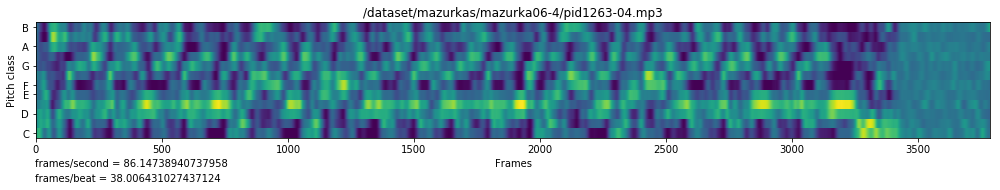

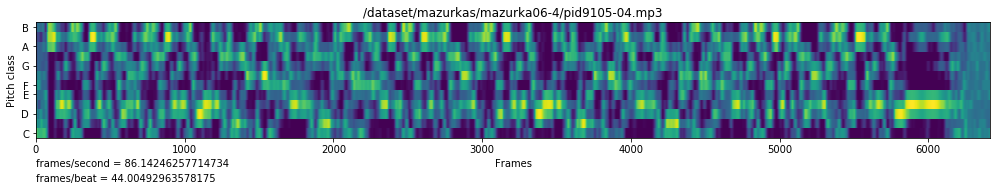

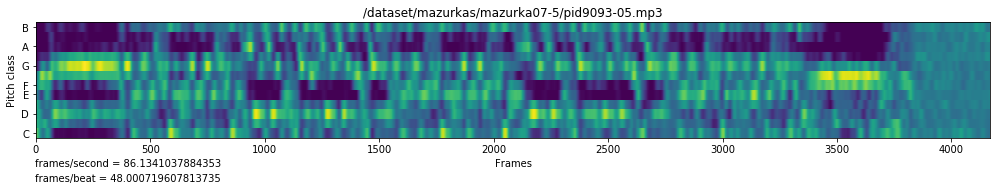

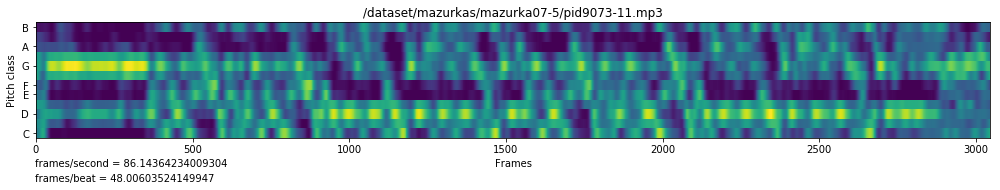

In [22]:

for song in pipeline.songs:
    plt.figure(figsize=(14, 3))
    plot_chroma(song, cmap='viridis')
    plt.tight_layout()

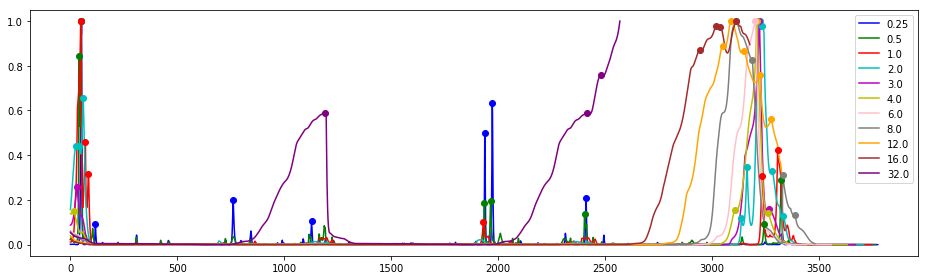

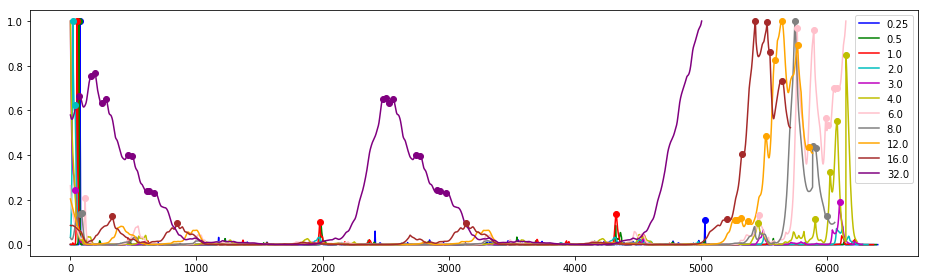

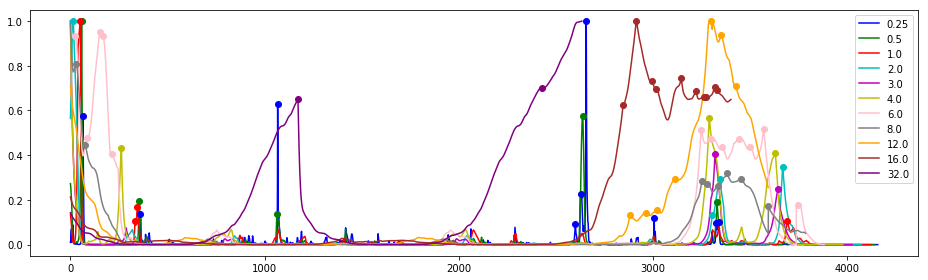

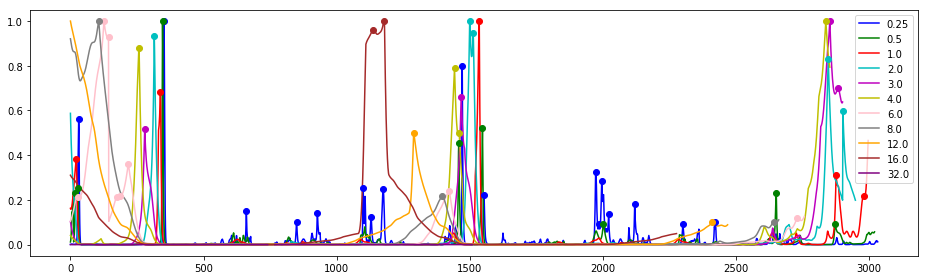

In [25]:
for song in pipeline.songs:
    plt.figure(figsize=(13, 4))
    plot_profiles(song.profiles)
    plot_peaks(song.peaks, song.profiles)
    plt.legend(np.array([i for i in multipliers]))
    plt.tight_layout()

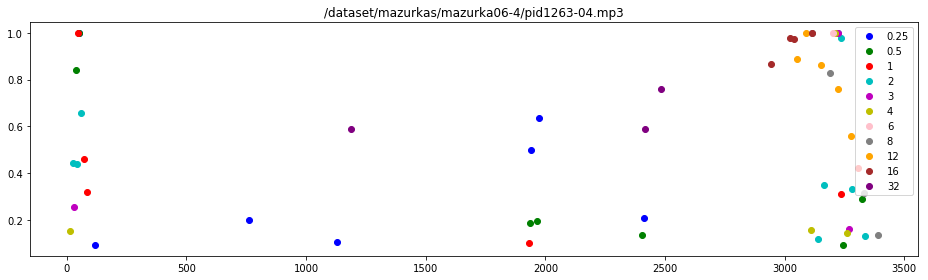

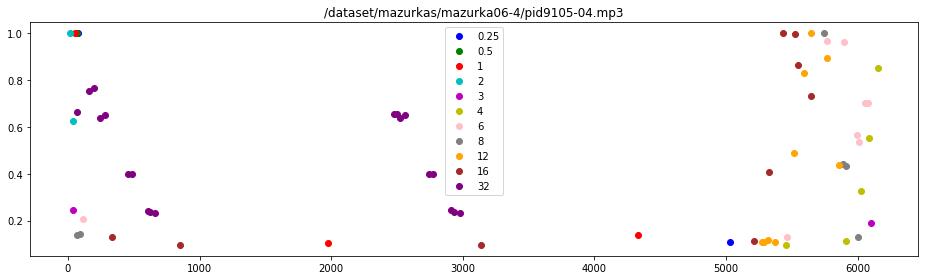

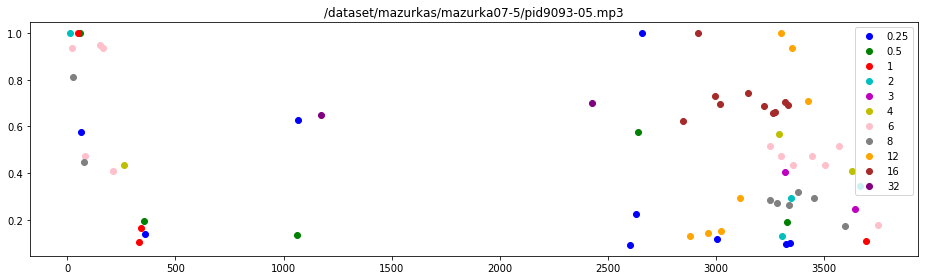

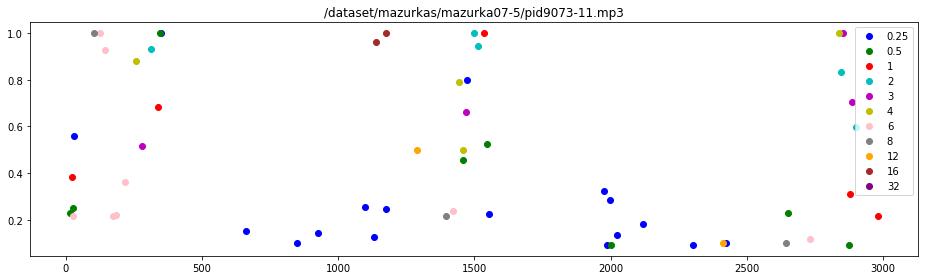

In [26]:
for song in pipeline.songs:    
    plt.figure(figsize=(13, 4))
    plot_peaks(song.peaks, song.profiles)    
    plt.title(song.path)
    plt.legend([round(i, 2) for i in multipliers])
    plt.tight_layout()

In [27]:
print('profile size: %s' % song.profiles[0].data.size)
print('profile max: %s' % max(song.profiles[0].data))
print('peaks: %s' % song.peaks[0].size)

profile size: 3034
profile max: 1.0
peaks: 17


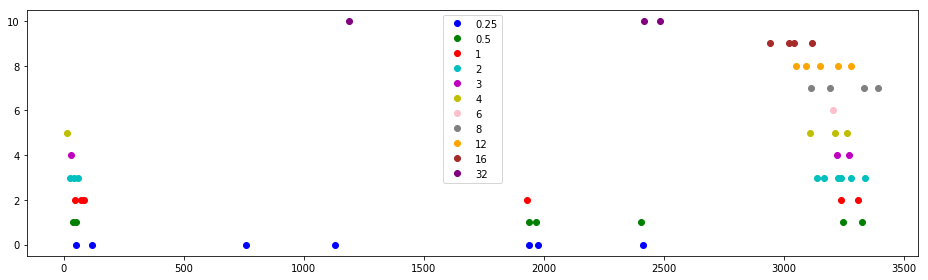

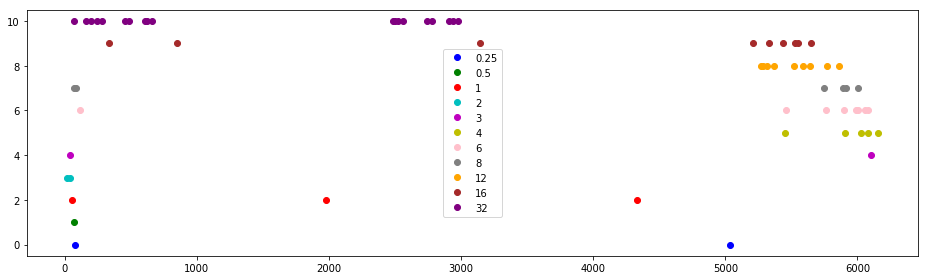

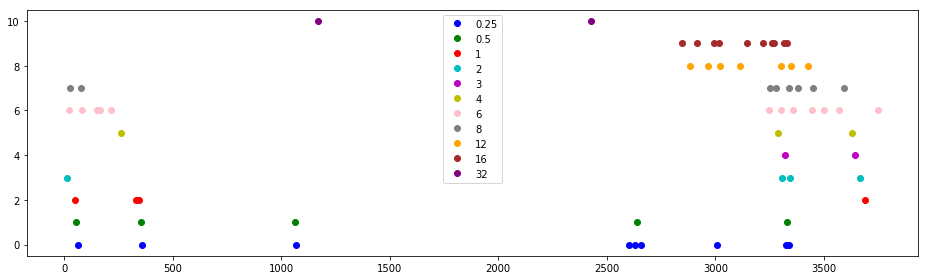

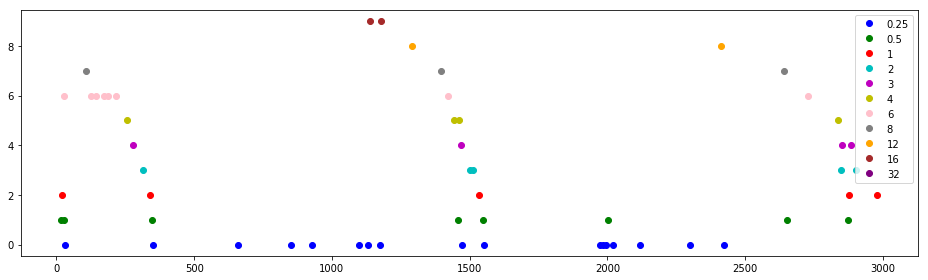

In [28]:
for song in pipeline.songs:
    plt.figure(figsize=(13, 4))
    #plot_chroma(song, cmap='gray_r')
    plot_constellation(song.peaks)
    plt.legend([round(i, 2) for i in multipliers])
    plt.tight_layout()
    IPython.display.Audio(song.path)


In [19]:
def matches(song1, song2):
  s1 = set(song1.tokens)
  s2 = set(song2.tokens)
  return len([value for value in s1 if value in s2])


for song1 in pipeline.songs:
  for song2 in pipeline.songs:
    m = matches(song1, song2)
    s1 = set(song1.tokens)
    s2 = set(song2.tokens)
    print(song1.path, song2.path, m, m/len(s1), m/len(s2))

/dataset/mazurkas/mazurka06-4/pid1263-04.mp3 /dataset/mazurkas/mazurka06-4/pid1263-04.mp3 2 1.0 1.0
/dataset/mazurkas/mazurka06-4/pid1263-04.mp3 /dataset/mazurkas/mazurka06-4/pid9105-04.mp3 0 0.0 0.0
/dataset/mazurkas/mazurka06-4/pid1263-04.mp3 /dataset/mazurkas/mazurka07-5/pid9093-05.mp3 0 0.0 0.0


ZeroDivisionError: division by zero

<function matplotlib.pyplot.show(*args, **kw)>

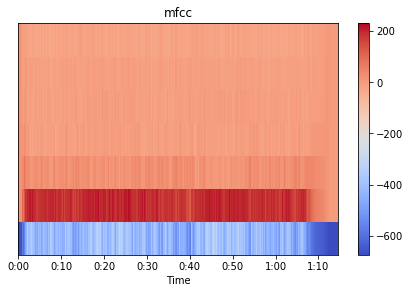

In [74]:
song = pipeline.songs[1]
mfccs = librosa.feature.mfcc(y=song.y, sr=song.sr, n_mfcc=7)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')
plt.show